# Autoencoders

## Importo bibliotecas

In [1]:
import numpy as np
#import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

## Importo datos MNIST

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)

C:\Users\juan\Miniconda2\envs\brain\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


## Defino grafo computacional

In [3]:
learning_rate = 0.01
batch_size = 256

display_step = 1000
examples_to_show = 10

num_hidden_1 = 256 
num_hidden_2 = 32 #128 
num_input = 784 

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

def encoder(x):
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


def decoder(x):
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

y_pred = decoder_op
y_true = X

loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)


## Entreno la red

In [4]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

print('Entrenando...')
for i in range(10001):
    batch_x, _ = mnist.train.next_batch(batch_size)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    if i % 1000 == 0:
        print('Paso %i: Costo del Mini-lote: %f' % (i, l))

Entrenando...
Paso 0: Costo del Mini-lote: 0.478142
Paso 1000: Costo del Mini-lote: 0.171090
Paso 2000: Costo del Mini-lote: 0.089396
Paso 3000: Costo del Mini-lote: 0.051273
Paso 4000: Costo del Mini-lote: 0.044476
Paso 5000: Costo del Mini-lote: 0.042557
Paso 6000: Costo del Mini-lote: 0.039470
Paso 7000: Costo del Mini-lote: 0.040097
Paso 8000: Costo del Mini-lote: 0.039385
Paso 9000: Costo del Mini-lote: 0.038151
Paso 10000: Costo del Mini-lote: 0.038625


## Probando el autoencoder

Imágenes originales


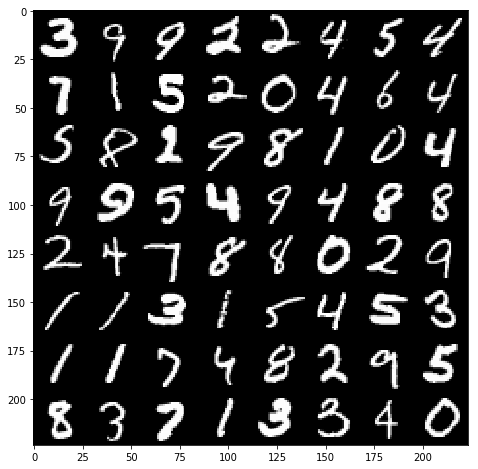

Imágenes reconstruidas


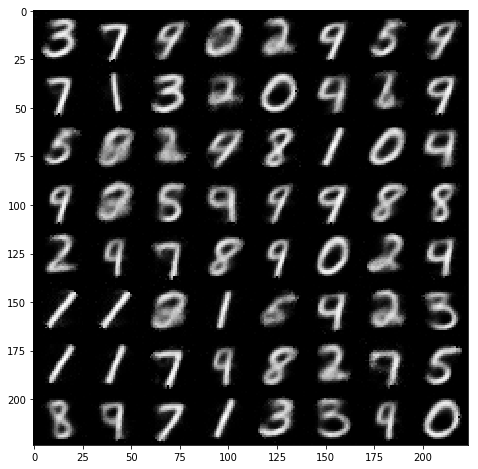

In [5]:
n = 8
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    batch_x, _ = mnist.test.next_batch(n)
    g = sess.run(decoder_op, feed_dict={X: batch_x})

    for j in range(n):
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
            batch_x[j].reshape([28, 28])
            
    for j in range(n):
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
            g[j].reshape([28, 28])

print("Imágenes originales")
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Imágenes reconstruidas")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()